<a href="https://colab.research.google.com/github/mrbadrul/MANB2153/blob/master/conteng_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
files.upload()

{}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets list -s IDC

ref                                               title                         size  lastUpdated          downloadCount  
------------------------------------------------  ----------------------------  ----  -------------------  -------------  
paultimothymooney/breast-histopathology-images    Breast Histopathology Images   1GB  2017-12-19 05:46:40           5473  
simjeg/lymphoma-subtype-classification-fl-vs-cll  Breast Histology Images       33MB  2017-05-13 09:14:28           2267  


In [7]:
!kaggle datasets download paultimothymooney/breast-histopathology-images

 99% 1.48G/1.49G [00:13<00:00, 134MB/s]
100% 1.49G/1.49G [00:13<00:00, 121MB/s]


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('breast-histopathology-images.zip', 'r')
zip_ref.extractall()
zip_ref.close()

zip_ref = zipfile.ZipFile('IDC_regular_ps50_idx5.zip', 'r')
zip_ref.extractall()
zip_ref.close()



In [10]:
import tensorflow as tf
from glob import glob
imagePatches = glob('***/**/*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

16533/0/16533_idx5_x2101_y301_class0.png
16533/0/16533_idx5_x201_y1151_class0.png
16533/0/16533_idx5_x1151_y201_class0.png
16533/0/16533_idx5_x401_y1051_class0.png
16533/0/16533_idx5_x1951_y601_class0.png
16533/0/16533_idx5_x651_y451_class0.png
16533/0/16533_idx5_x551_y751_class0.png
16533/0/16533_idx5_x1851_y651_class0.png
16533/0/16533_idx5_x501_y1051_class0.png
16533/0/16533_idx5_x1951_y451_class0.png


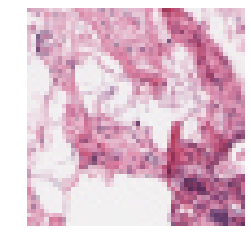

In [11]:
import cv2
import matplotlib.pyplot as plt
image_name = "13462/0/13462_idx5_x2551_y2651_class0.png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (50, 50)) 
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)

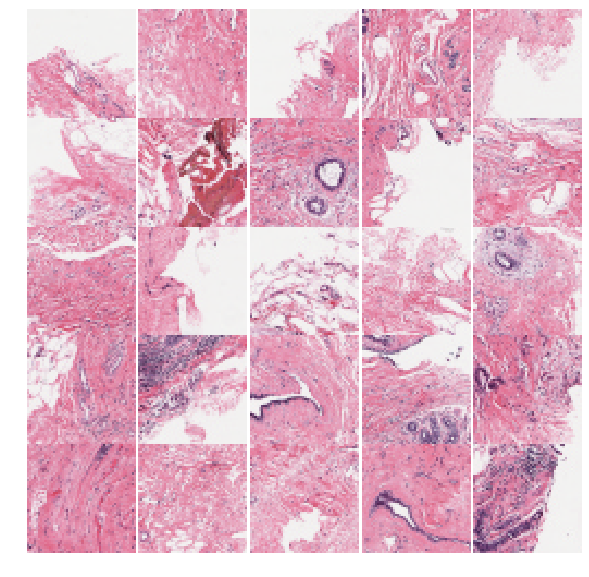

In [12]:
# Plot Multiple Images
bunchOfImages = imagePatches
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (50, 50)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

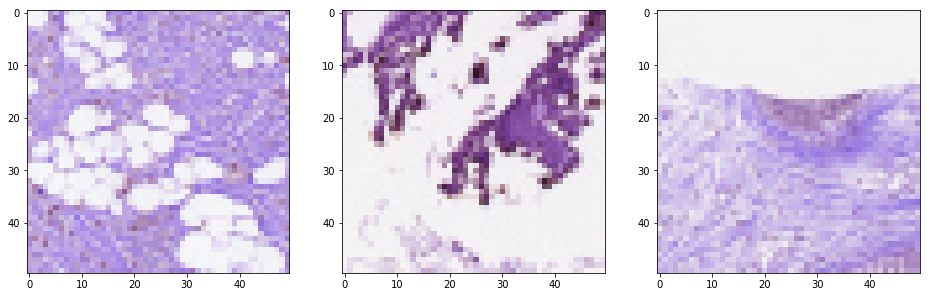

In [23]:
import random
def randomImages(a):
    r = random.sample(a, 4)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
randomImages(imagePatches)

In [24]:
import fnmatch
import os
patternZero = '*class0.png'
patternOne = '*class1.png'
classZero = fnmatch.filter(imagePatches, patternZero)
classOne = fnmatch.filter(imagePatches, patternOne)
print("IDC(-)\n\n",classZero[0:5],'\n')
print("IDC(+)\n\n",classOne[0:5])

IDC(-)

 ['16533/0/16533_idx5_x2101_y301_class0.png', '16533/0/16533_idx5_x201_y1151_class0.png', '16533/0/16533_idx5_x1151_y201_class0.png', '16533/0/16533_idx5_x401_y1051_class0.png', '16533/0/16533_idx5_x1951_y601_class0.png'] 

IDC(+)

 ['16533/1/16533_idx5_x1201_y1651_class1.png', '16533/1/16533_idx5_x1151_y751_class1.png', '16533/1/16533_idx5_x1251_y1601_class1.png', '16533/1/16533_idx5_x1451_y1101_class1.png', '16533/1/16533_idx5_x1051_y1201_class1.png']


In [0]:
def proc_images(lowerIndex,upperIndex):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """ 
    x = []
    y = []
    WIDTH = 50
    HEIGHT = 50
    for img in imagePatches[lowerIndex:upperIndex]:
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
        if img in classZero:
            y.append(0)
        elif img in classOne:
            y.append(1)
        else:
            return
    return x,y

In [0]:
import pandas as pd
import numpy as np
X,Y = proc_images(0,90000)
df = pd.DataFrame()
df["images"]=X
df["labels"]=Y
X2=df["images"]
Y2=df["labels"]
X2=np.array(X2)
imgs0=[]
imgs1=[]
imgs0 = X2[Y2==0] # (0 = no IDC, 1 = IDC)
imgs1 = X2[Y2==1] 

In [29]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Percentage of positive images: {:.2f}%'.format(100*np.mean(b)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X2,Y2)

Total number of images: 90000
Number of IDC(-) Images: 65079
Number of IDC(+) Images: 24921
Percentage of positive images: 27.69%
Image shape (Width, Height, Channels): (50, 50, 3)


In [30]:
dict_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
print(df.head(10))
print("")
print(dict_characters)

                                              images  labels
0  [[[241, 242, 242], [241, 242, 242], [241, 242,...       0
1  [[[168, 140, 224], [187, 162, 227], [198, 176,...       0
2  [[[242, 243, 243], [242, 243, 243], [241, 243,...       0
3  [[[107, 56, 97], [186, 162, 196], [208, 195, 2...       0
4  [[[162, 133, 226], [208, 190, 233], [169, 141,...       0
5  [[[242, 242, 243], [242, 242, 242], [241, 242,...       0
6  [[[158, 131, 217], [140, 110, 214], [130, 101,...       0
7  [[[169, 140, 228], [158, 124, 225], [162, 129,...       0
8  [[[208, 188, 238], [151, 118, 216], [115, 72, ...       0
9  [[[189, 162, 228], [202, 187, 237], [180, 151,...       0

{0: 'IDC(-)', 1: 'IDC(+)'}


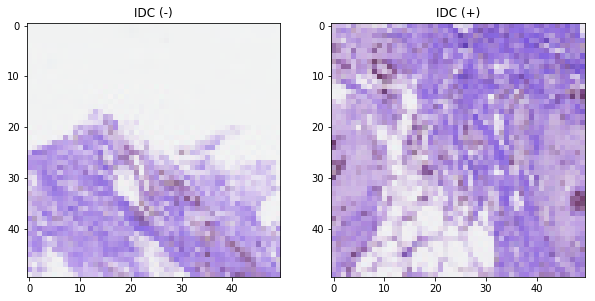

In [31]:
def plotOne(a,b):
    """
    Plot one numpy array
    """
    plt.subplot(1,2,1)
    plt.title('IDC (-)')
    plt.imshow(a[0])
    plt.subplot(1,2,2)
    plt.title('IDC (+)')
    plt.imshow(b[0])
plotOne(imgs0, imgs1) 

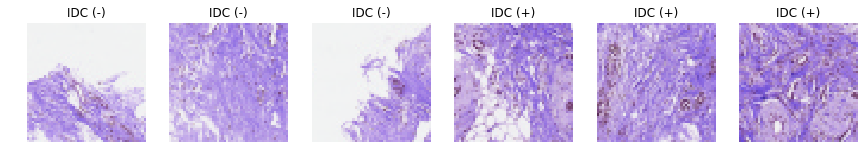

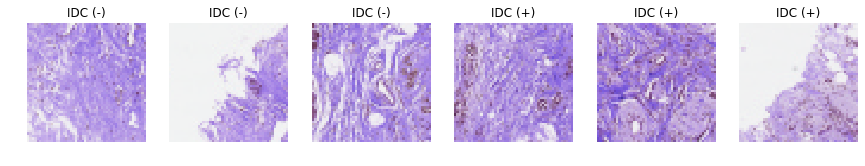

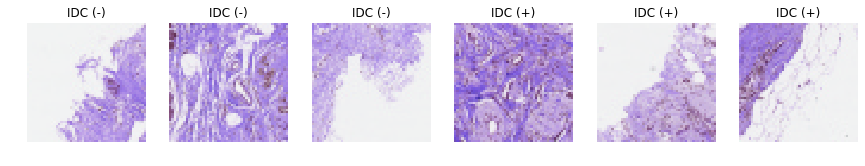

In [32]:
def plotTwo(a,b): 
    """
    Plot a bunch of numpy arrays sorted by label
    """
    for row in range(3):
        plt.figure(figsize=(20, 10))
        for col in range(3):
            plt.subplot(1,8,col+1)
            plt.title('IDC (-)')
            plt.imshow(a[0+row+col])
            plt.axis('off')       
            plt.subplot(1,8,col+4)
            plt.title('IDC (+)')
            plt.imshow(b[0+row+col])
            plt.axis('off')
plotTwo(imgs0, imgs1) 

The data is scaled from 0 to 256 but we want it to be scaled from 0 to 1. This will make the data compatible with a wide variety of different classification algorithms. We also want to set aside 20% of the data for testing. This will make the trained model less prone to overfitting. And finally, we will use an oversampling strategy to deal with the imbalanced class sizes.

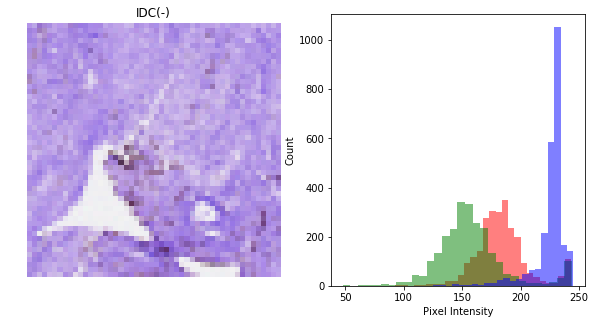

In [33]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    plt.title('IDC(+)' if Y[1] else 'IDC(-)')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X2[100])

In [5]:
from sklearn.model_selection import train_test_split
X=np.array(X)
X=X/255.0

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Reduce Sample Size for DeBugging
X_train = X_train[0:300000] 
Y_train = Y_train[0:300000]
X_test = X_test[0:300000] 
Y_test = Y_test[0:300000]

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

NameError: ignored

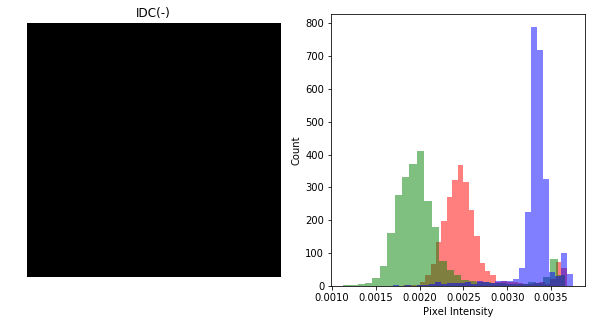

In [37]:
plotHistogram(X_train[100])

In [0]:
from keras.utils import to_categorical
# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_trainHot = to_categorical(Y_train, num_classes = 2)
Y_testHot = to_categorical(Y_test, num_classes = 2)

{0: 'IDC(-)', 1: 'IDC(+)'}


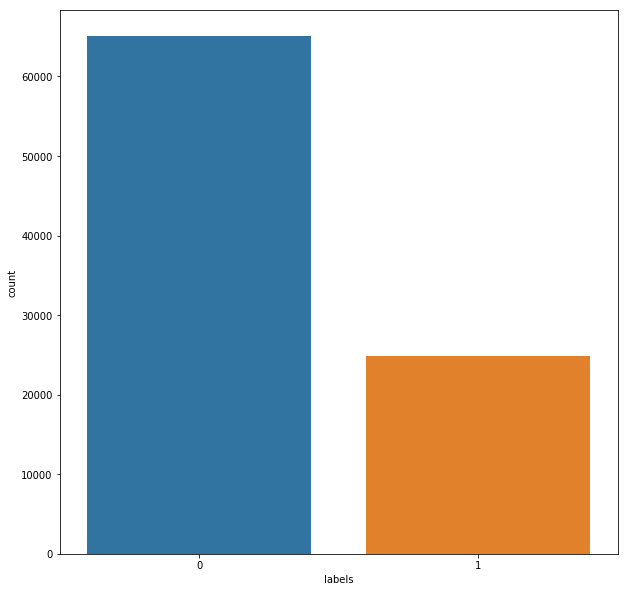

In [48]:
import seaborn as sns
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

In [4]:
import os 
import numpy as np 
from keras.preprocessing import image
# Deal with imbalanced class sizes below
# Make Data 1D for compatability upsampling methods
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)
#print("X_train Shape: ",X_train.shape)
#print("X_test Shape: ",X_test.shape)
#print("X_trainFlat Shape: ",X_trainFlat.shape)
#print("X_testFlat Shape: ",X_testFlat.shape)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#ros = RandomOverSampler(ratio='auto')
ros = RandomUnderSampler(ratio='auto')
X_trainRos, Y_trainRos = ros.fit_sample(X_trainFlat, Y_train)
X_testRos, Y_testRos = ros.fit_sample(X_testFlat, Y_test)

# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 2)
Y_testRosHot = to_categorical(Y_testRos, num_classes = 2)
#print("X_train: ", X_train.shape)
#print("X_trainFlat: ", X_trainFlat.shape)
#print("X_trainRos Shape: ",X_trainRos.shape)
#print("X_testRos Shape: ",X_testRos.shape)
#print("Y_trainRosHot Shape: ",Y_trainRosHot.shape)
#print("Y_testRosHot Shape: ",Y_testRosHot.shape)

for i in range(len(X_trainRos)):
    height, width, channels = 50,50,3
    X_trainRosReshaped = X_trainRos.reshape(len(X_trainRos),height,width,channels)
#print("X_trainRos Shape: ",X_trainRos.shape)
#print("X_trainRosReshaped Shape: ",X_trainRosReshaped.shape)

for i in range(len(X_testRos)):
    height, width, channels = 50,50,3
    X_testRosReshaped = X_testRos.reshape(len(X_testRos),height,width,channels)
#print("X_testRos Shape: ",X_testRos.shape)
#print("X_testRosReshaped Shape: ",X_testRosReshaped.shape)

dfRos = pd.DataFrame()
dfRos["labels"]=Y_trainRos
labRos = dfRos['labels']
distRos = lab.value_counts()
sns.countplot(labRos)
print(dict_characters)

NameError: ignored